### IMPORTING THE PACKAGES

In [1]:
#imprt packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATA

In [4]:
#read data
df = pd.read_excel('/content/drive/MyDrive/HR_EMPLOYEE_DATA.xlsx')

### CLEANING THE DATA

In [5]:
#explore the data
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [6]:
#Data Dimension
df.shape

(1470, 41)

In [7]:
# Check for dubplicated data
df.duplicated().sum()

0

In [8]:
# Check the df to see if there are missing values
df.isna().sum()

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Over18                        0
Training Times Last Year      0
-2                            0
0                             0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performa

In [9]:
#checking and dealing inconsistent data type if needed
df.dtypes

Attrition                     object
Business Travel               object
CF_age band                   object
CF_attrition label            object
Department                    object
Education Field               object
emp no                        object
Employee Number                int64
Gender                        object
Job Role                      object
Marital Status                object
Over Time                     object
Over18                        object
Training Times Last Year       int64
-2                             int64
0                              int64
Age                            int64
CF_current Employee            int64
Daily Rate                     int64
Distance From Home             int64
Education                     object
Employee Count                 int64
Environment Satisfaction       int64
Hourly Rate                    int64
Job Involvement                int64
Job Level                      int64
Job Satisfaction               int64
M

In [10]:
#checking and dealing with inconsistencies in categorical values
object_cols = df.select_dtypes("object").columns
for column in object_cols:
  print(column, df[column].unique())

Attrition ['Yes' 'No']
Business Travel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
CF_age band ['35 - 44' '45 - 54' '25 - 34' 'Over 55' 'Under 25']
CF_attrition label ['Ex-Employees' 'Current Employees']
Department ['Sales' 'R&D' 'HR']
Education Field ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
emp no ['STAFF-1' 'STAFF-2' 'STAFF-4' ... 'STAFF-1667' 'STAFF-1878' 'STAFF-1702']
Gender ['Female' 'Male']
Job Role ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Marital Status ['Single' 'Married' 'Divorced']
Over Time ['Yes' 'No']
Over18 ['Y']
Education ['Associates Degree' 'High School' "Master's Degree" "Bachelor's Degree"
 'Doctoral Degree']


In [11]:
#replacing 'y' with 'yes' in column 'over18'
df ['Over18']= df['Over18'].replace ('Y', 'Yes')

In [12]:
#Cheking and dealing with inappropriate or unusual data points if needed
num_cols = df.select_dtypes("number").columns
df[num_cols].describe()

,Employee Number,Training Times Last Year,-2,0,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.0,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,-2.0,0.0,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,...,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,0.0,0.0,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,...,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,-2.0,0.0,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,-2.0,0.0,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,-2.0,0.0,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,-2.0,0.0,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,-2.0,0.0,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### VISUALIZING THE DATA

In [13]:
#Plot a correlation map for all numeric variable Overtime
num_cols = df.select_dtypes("number")
correlation_matrix = num_cols.corr()

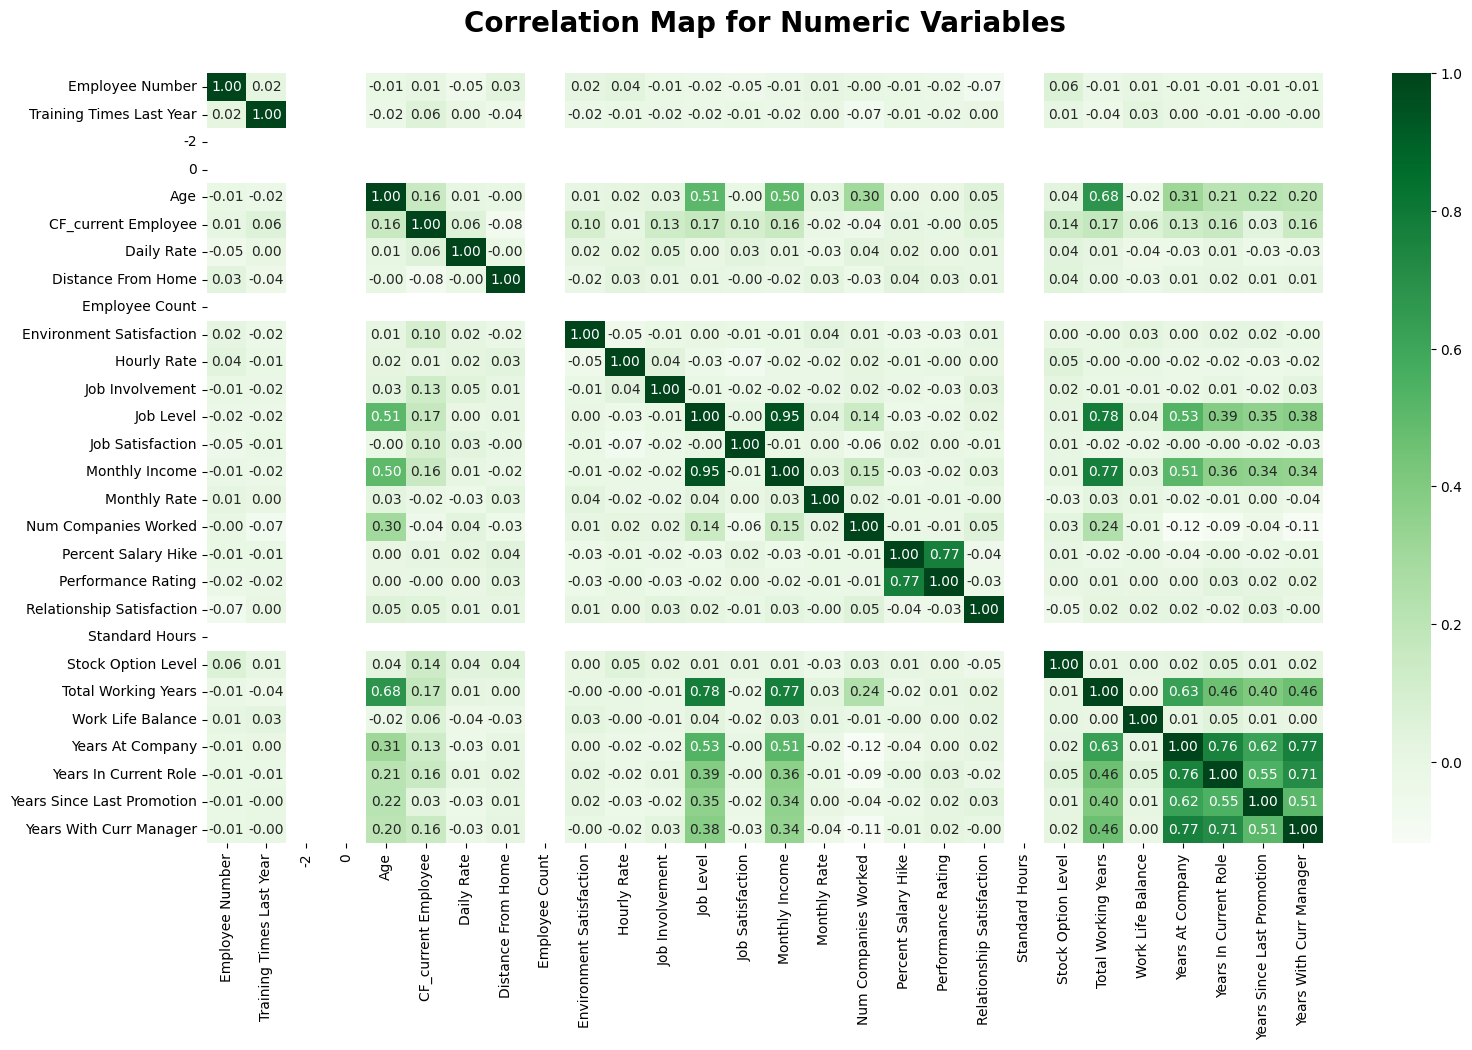

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 10))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f")
# Show the plot
plt.title("Correlation Map for Numeric Variables",fontsize=20, fontweight='bold', color='black',  pad = 30)
plt.show()

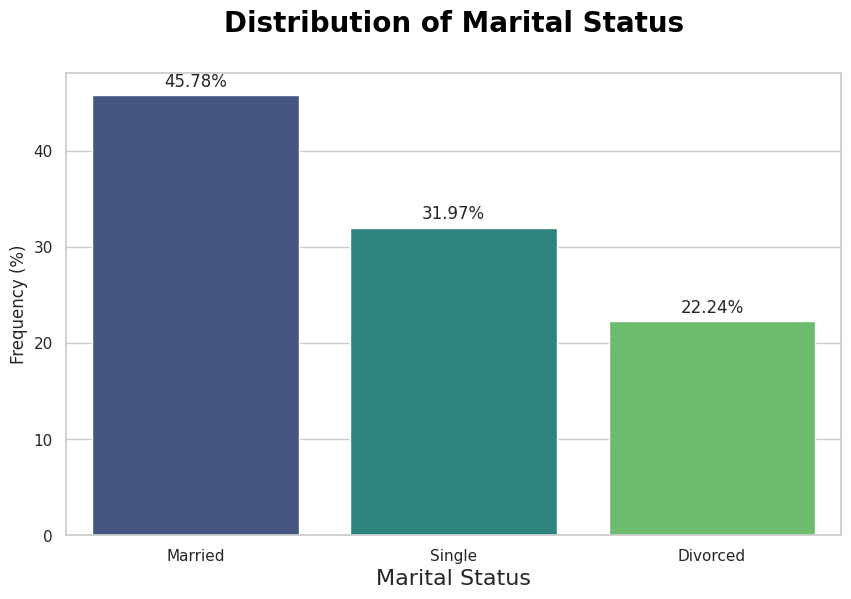

In [16]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Calculate frequencies as percentages
total_rows = len(df)
freq_data = df['Marital Status'].value_counts() / total_rows * 100

# Create a bar plot with frequencies
ax = sns.barplot(x=freq_data.index, y=freq_data.values, palette='viridis')

# Annotate each bar with its percentage
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot labels and title
plt.xlabel('Marital Status',fontsize=16)
plt.xlabel('Marital Status',fontsize=16)
plt.ylabel('Frequency (%)')
plt.title('Distribution of Marital Status',fontsize=20, fontweight='bold', color='black', pad = 30)

# Show the plot
plt.show()

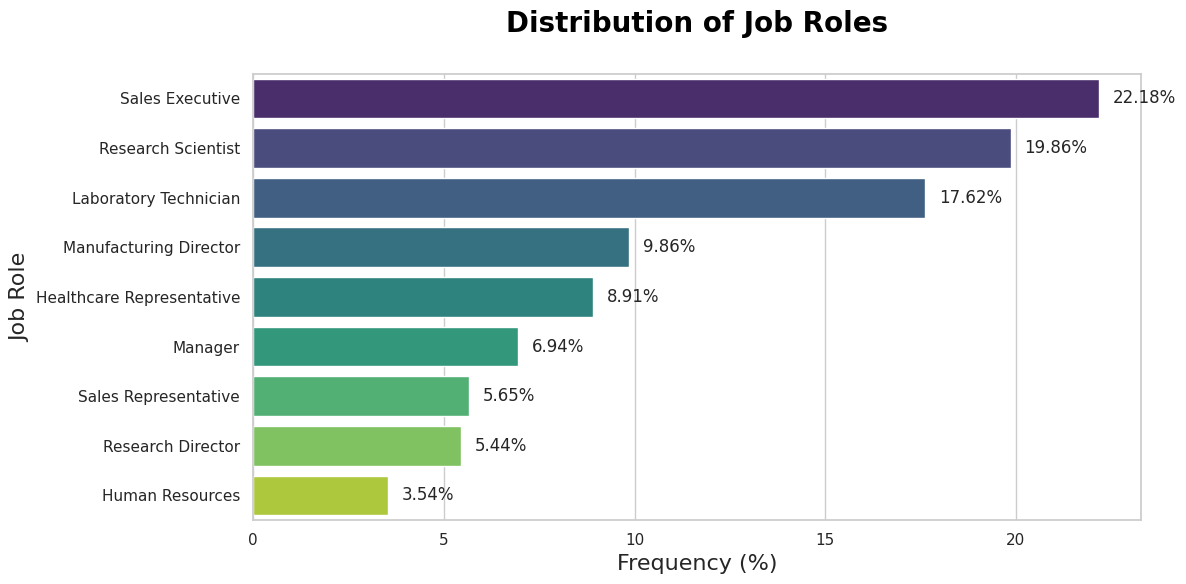

In [17]:
#barplot of Distribution of Job Roles
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Calculate frequencies as percentages
total_rows = len(df)
freq_data_job = df['Job Role'].value_counts() / total_rows * 100

# Create a bar plot with frequencies
ax = sns.barplot(y=freq_data_job.index, x=freq_data_job.values, palette='viridis')

# Annotate each bar with its percentage
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(10, 0), textcoords='offset points')
# Set plot labels and title
plt.ylabel('Job Role',fontsize=16)
plt.xlabel('Frequency (%)',fontsize=16)
plt.title('Distribution of Job Roles',fontsize=20, fontweight='bold', color='black', pad = 30)


# Show the plot
plt.tight_layout()
plt.show()

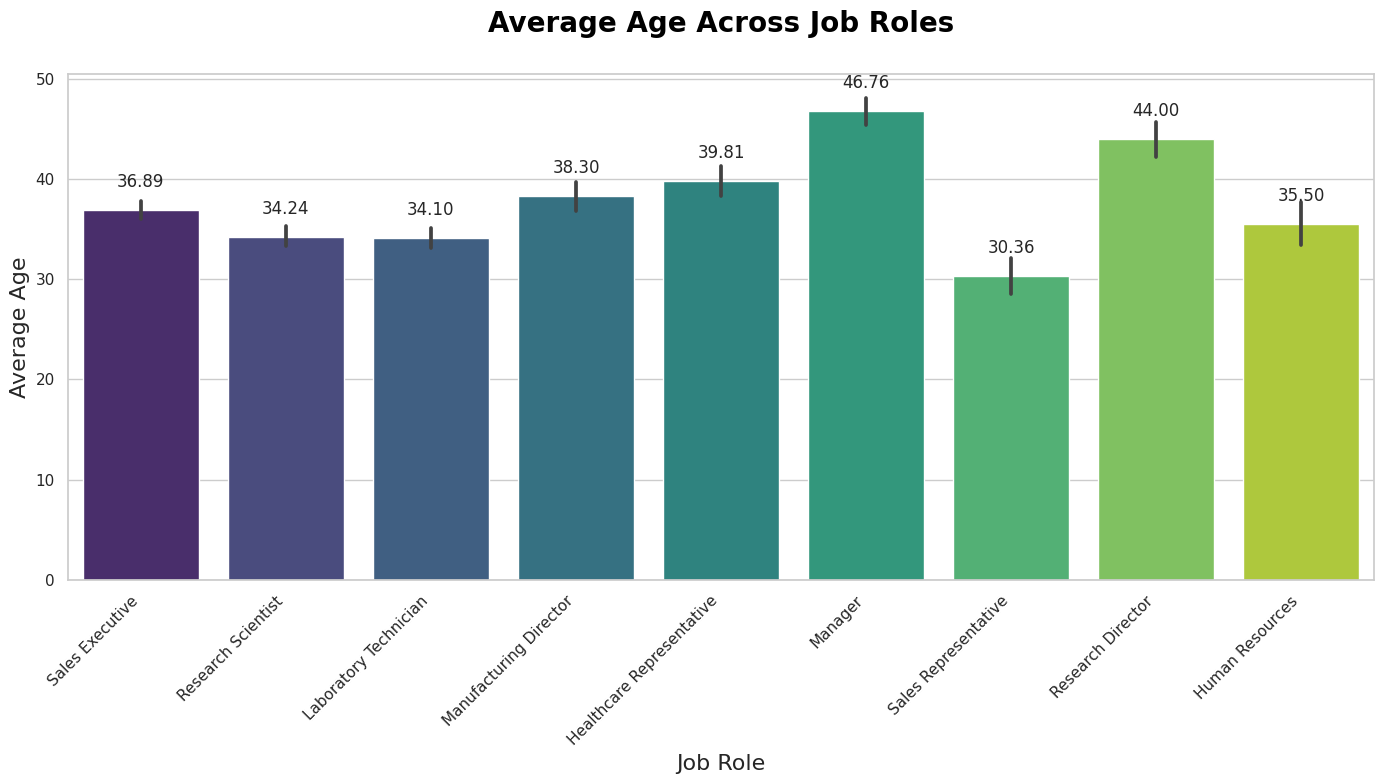

In [18]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Create a bar plot showing the average age for each job role
ax = sns.barplot(x='Job Role', y='Age', data=df, palette='viridis')

# Annotate each bar with its average age
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points'
                )

# Set plot labels and title
plt.xlabel('Job Role',fontsize=16)
plt.ylabel('Average Age',fontsize=16)
plt.title('Average Age Across Job Roles',fontsize=20, fontweight='bold', color='black', pad = 30)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

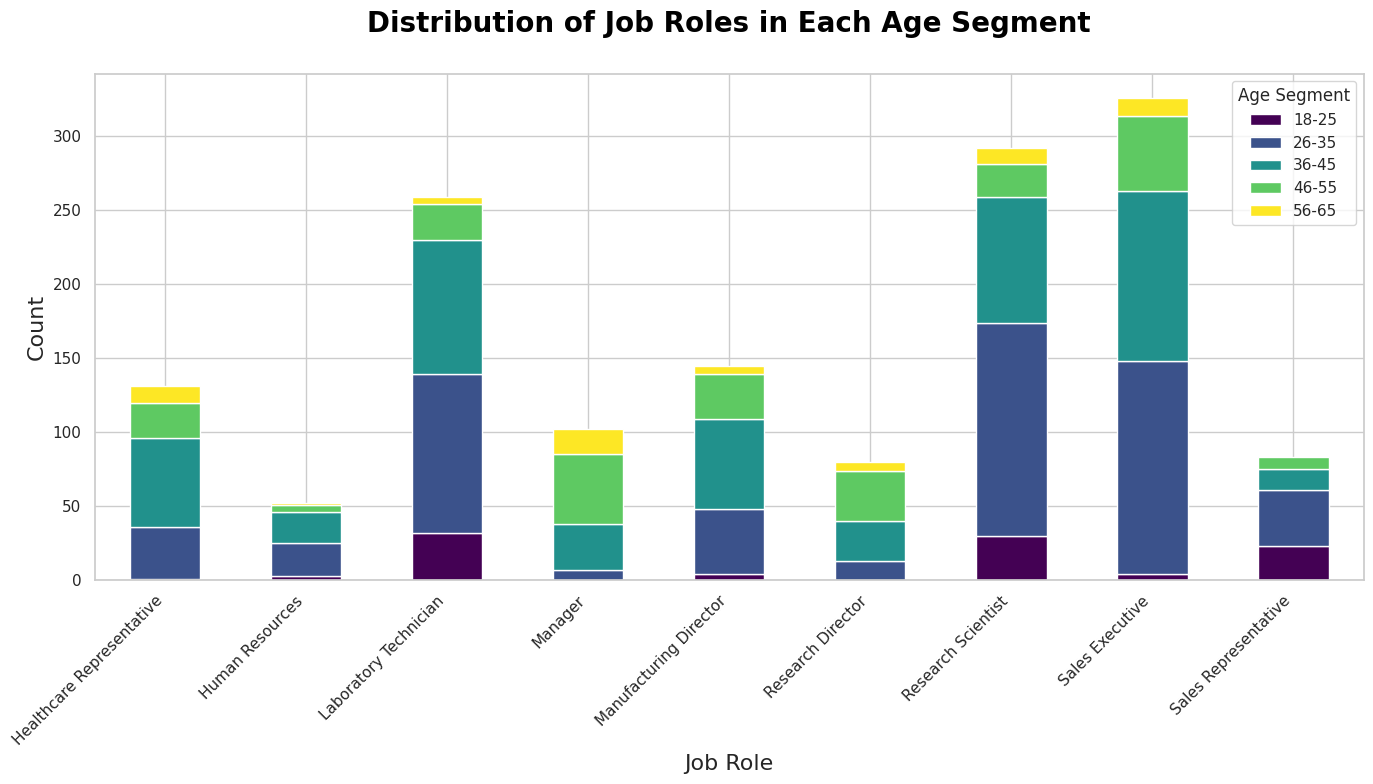

In [19]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

bins = [18, 25, 35, 45, 55, 65, 100]  # Define your age segments
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # Labels for segments

# Create a new column 'AgeSegment' based on the defined bins and labels
df['Age Segment'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a crosstab to get counts for each JobRole-AgeSegment combination
cross_tab = pd.crosstab(df['Job Role'], df['Age Segment'])

# Create a stacked bar plot
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')


# Set plot labels and title
plt.xlabel('Job Role',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Distribution of Job Roles in Each Age Segment',fontsize=20, fontweight='bold', color='black', pad = 30)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

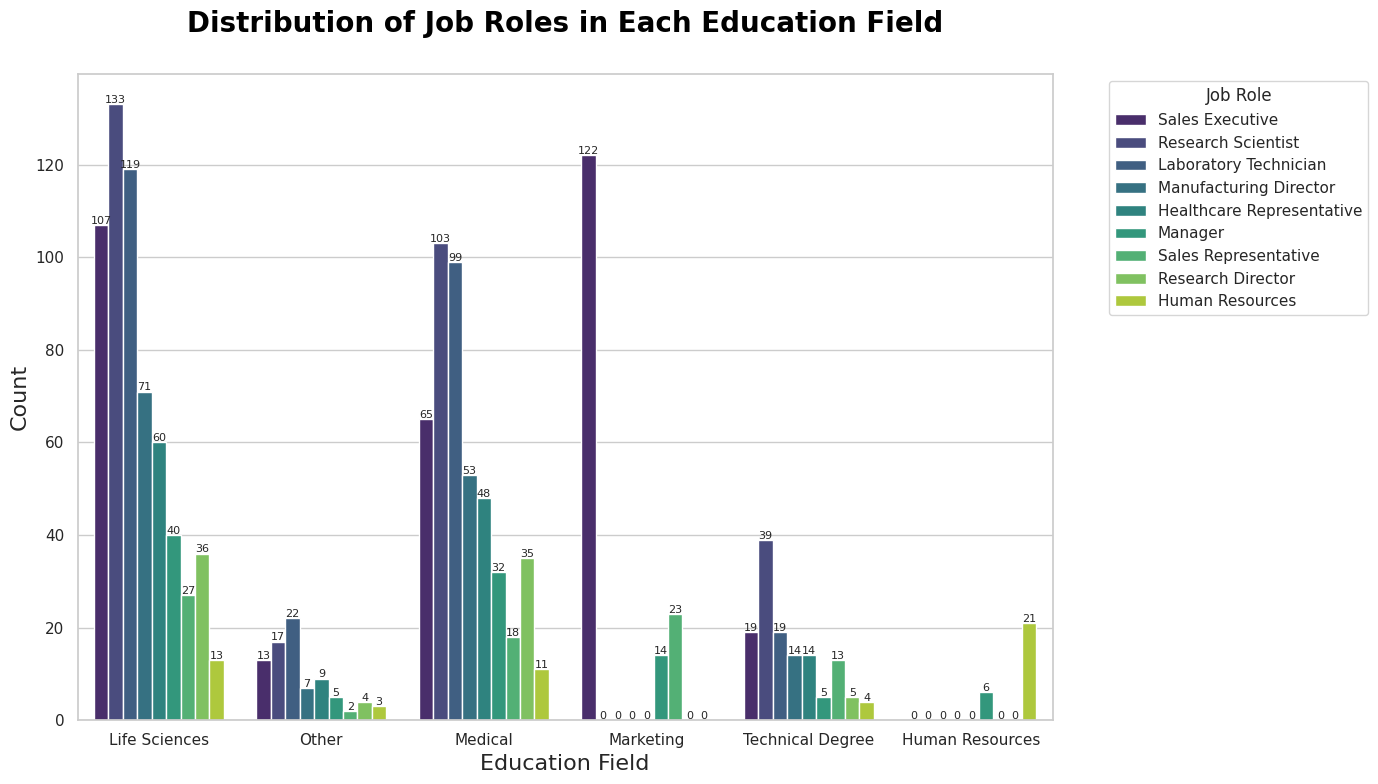

In [20]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Create a grouped bar plot
ax = sns.countplot(x='Education Field', hue='Job Role', data=df, palette='viridis')

# Annotate each bar with its average age
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 3), textcoords='offset points', fontsize=8
                )
# Set plot labels and title
plt.xlabel('Education Field',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Distribution of Job Roles in Each Education Field',fontsize=20, fontweight='bold', color='black', pad = 30)


# Show the plot with a legend
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

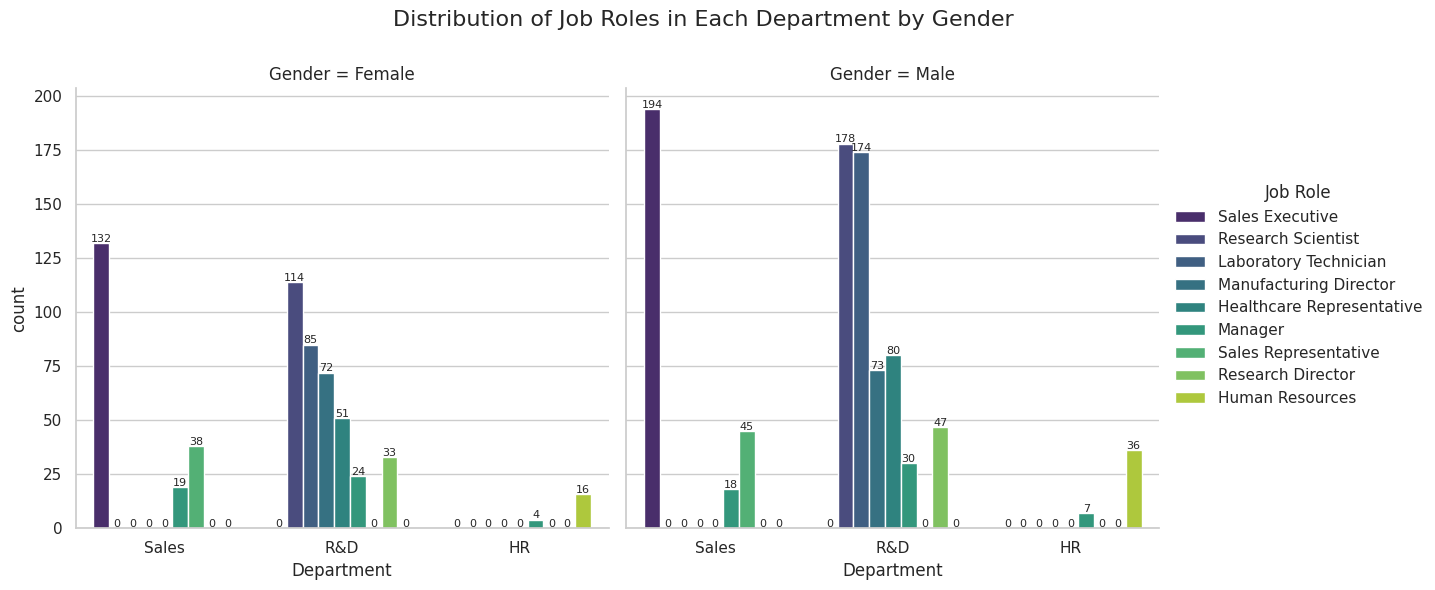

In [21]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Create a catplot
g=sns.catplot(x='Department', hue='Job Role', col='Gender', data=df, kind='count', palette='viridis', height=6, aspect=1)

# Annotate each bar with its count
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 3), textcoords='offset points', fontsize=8)

# Set plot labels and title
plt.subplots_adjust(top=0.85)
plt.suptitle('Distribution of Job Roles in Each Department by Gender', fontsize=16)
plt.xlabel('Department')
plt.ylabel('Count')

# Show the plot
plt.show()